# Data manipulation
Acquires data and reads it into the computer for processing

## First
tensor

In [1]:
import torch
x=torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [2]:
x.shape

torch.Size([12])

In [3]:
x.numel()

12

In [4]:
X=x.reshape(3,4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [5]:
torch.zeros(2,3,4)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [6]:
torch.ones(2,3,4)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [7]:
torch.randn(3,4)  #Random sampling in a standard Gassian distribution

tensor([[-0.7870, -0.7754, -0.9827,  1.1382],
        [-2.7542,  0.9359, -0.6562, -0.1259],
        [ 0.0089, -0.8775, -0.9001, -0.7388]])

In [8]:
torch.tensor([[1,2,3,4],[1,3,4,5],[2,3,1,4]])

tensor([[1, 2, 3, 4],
        [1, 3, 4, 5],
        [2, 3, 1, 4]])

In [9]:
x=torch.arange(5)
y=torch.tensor([4,1,2,3,1])
x+y,x-y,x*y,x/y,x**y

(tensor([4, 2, 4, 6, 5]),
 tensor([-4,  0,  0,  0,  3]),
 tensor([0, 1, 4, 9, 4]),
 tensor([0., 1., 1., 1., 4.]),
 tensor([ 0,  1,  4, 27,  4]))

In [10]:
torch.exp(x) #find the power sign

tensor([ 1.0000,  2.7183,  7.3891, 20.0855, 54.5981])

In [11]:
X=torch.arange(12,dtype=torch.float32).reshape(3,4)
Y=torch.tensor([[1,3,5,2],[1,2,3,2],[1,5,3,9]])
torch.cat((X,Y),dim=0),torch.cat((X,Y),dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 1.,  3.,  5.,  2.],
         [ 1.,  2.,  3.,  2.],
         [ 1.,  5.,  3.,  9.]]),
 tensor([[ 0.,  1.,  2.,  3.,  1.,  3.,  5.,  2.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  2.],
         [ 8.,  9., 10., 11.,  1.,  5.,  3.,  9.]]))

In [12]:
X.sum()

tensor(66.)

In [13]:
#Broadcast Mechanism
a=torch.arange(3).reshape(3,1)
b=torch.arange(2).reshape(1,2)
a,b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [14]:
a+b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [15]:
X[-1],X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [16]:
X[1,2]=9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [17]:
X[0:2,:]=12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [18]:
before =id(Y)
Y=Y+X
id(Y)==before

False

In [19]:
before=id(X)
X+=Y  #reduce memory overhead
id(X)==before

True

In [20]:
import os
os.makedirs(os.path.join('kaggle','input','data'),exist_ok=True)
data_files=os.path.join('kaggle','input','data','house_tiny.csv')
with open(data_files,'w') as f:
    f.write('NumRooms,Alley,Price\n') #listings
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')


In [21]:
import pandas as pd
data=pd.read_csv(data_files)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [22]:
inputs,outputs=data.iloc[:,0:2],data.iloc[:,2]
inputs=inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [23]:
inputs=pd.get_dummies(inputs,dummy_na=True)
print(inputs)


   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [24]:
import torch
X,y=torch.tensor(inputs.values),torch.tensor(outputs.values)
X,y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

In [25]:
x=torch.arange(4)
x

tensor([0, 1, 2, 3])

In [26]:
len(x)

4

In [27]:
x.shape

torch.Size([4])

In [28]:
A=torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [29]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [30]:
A=torch.arange(20,dtype=torch.float32).reshape(5,4)
B=A.clone()
A+B,A

(tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]))

In [31]:
A*B #Hadamard product

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [32]:
#Dimensionality reduction
x=torch.arange(4,dtype=torch.float32)
x,x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [33]:
A_sum=A.sum(axis=0,keepdims=True)
A_sum.shape,A_sum,A


(torch.Size([1, 4]),
 tensor([[40., 45., 50., 55.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]))

In [34]:
A_sum2=A.sum(axis=1,keepdims=True)
A_sum2.shape,A_sum2

(torch.Size([5, 1]),
 tensor([[ 6.],
         [22.],
         [38.],
         [54.],
         [70.]]))

In [35]:
A_mean=A.mean(axis=0,keepdims=True)
A_test=A.sum(axis=0)/A.shape[0]
A_mean,A_test

(tensor([[ 8.,  9., 10., 11.]]), tensor([ 8.,  9., 10., 11.]))

In [36]:
#Dot product
y=torch.ones(4,dtype=torch.float32)
x,y,torch.dot(x,y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [37]:
#Matrix-vector product
A.shape,x.shape,torch.mv(A,x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

In [38]:
#Matrix-matrix product
B=torch.ones(4,3)
torch.mm(A,B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

In [39]:
#Norm
u=torch.tensor([3.0,-4.0])
torch.norm(u)

tensor(5.)

In [40]:
torch.abs(u).sum()

tensor(7.)

In [41]:
torch.norm(torch.ones(4,9))

tensor(6.)

In [42]:
Z=A.T
Z.T==A

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

h=0.10000,numerical limit=2.30000
h=0.01000,numerical limit=2.03000
h=0.00100,numerical limit=2.00300
h=0.00010,numerical limit=2.00030
h=0.00001,numerical limit=2.00003


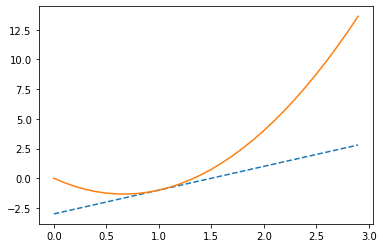

In [43]:
# Derivatives and Differentiable
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3*x**2-4*x

def numerical_lim(f,x,h):
    return (f(x+h)-f(x))/h

h=0.1
for i in range(5):
    print(f'h={h:.5f},numerical limit={numerical_lim(f,1,h):.5f}')
    h*=0.1
    
x=np.arange(0,3,0.1)
plt.plot(x,2*x-3,linestyle='--',label="Tangent line(x=1)")
plt.plot(x,f(x),label = 'f(x)')
plt.show()


In [44]:
#Automatic differentiation
import torch

x=torch.arange(4.0,requires_grad=True)
y=2*torch.dot(x,x)
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [45]:
#By default,pytorch accumulates gradients,and we need to clear the previous values.
x.grad.zero_()
y=x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [46]:
x.grad.zero_()
y=x*x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [47]:
#Separation calculation
x.grad.zero_()
y=x*x
u=y.detach()
z=u*x
z.sum().backward()
x.grad==u

tensor([True, True, True, True])

In [48]:
x.grad.zero_()
y.sum().backward()
x.grad==2*x

tensor([True, True, True, True])

In [49]:
#python gradient calculation for control flow
def f(a):
    b=a*2
    while b.norm()<1000:
        b=b*2
    if b.sum()>0:
        c=b
    else:
        c=100*b
    return c

a=torch.randn(size=(),requires_grad=True)
d=f(a)
d.backward()
a.grad==d/a

tensor(True)

In [50]:
#Basic probability theory
import torch
from torch.distributions import multinomial

fair_probs=torch.ones([6])/6
multinomial.Multinomial(1,fair_probs).sample()

tensor([0., 0., 0., 0., 0., 1.])

In [51]:
multinomial.Multinomial(10,fair_probs).sample()

tensor([3., 2., 0., 0., 3., 2.])

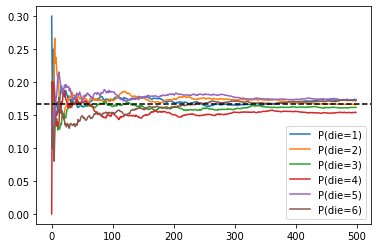

In [52]:
import matplotlib.pyplot as plt
counts=multinomial.Multinomial(10,fair_probs).sample((500,))
cum_counts=counts.cumsum(dim=0)
estimates=cum_counts/cum_counts.sum(dim=1,keepdim=True)
for i in range(6):
    plt.plot(estimates[:,i].numpy(),label=("P(die="+str(i+1)+")"))
plt.axhline(y=0.167,color='black',linestyle='dashed')
plt.legend()